Normalized PageRank Scores: [0.25198286 0.17329045 0.17948295 0.20212414 0.19311959] 



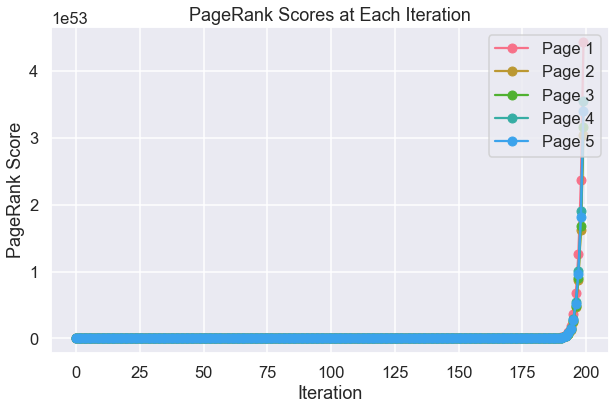

In [48]:
import numpy as np

def pagerank_original(adj_matrix, max_iterations=100, damping_factor=0.85, epsilon=1e-8):
    """
    Compute PageRank using the power iteration method.

    Parameters:
    - adj_matrix: The adjacency matrix representing the link structure of the web graph.
    - damping_factor: The probability of following a link (typically set to 0.85).
    - epsilon: Convergence threshold.
    - max_iterations: Maximum number of iterations.

    Returns:
    - A vector representing the PageRank scores for each node.
    """
    # Input validation
    if not isinstance(adj_matrix, np.ndarray) or adj_matrix.ndim != 2 or adj_matrix.shape[0] != adj_matrix.shape[1]:
        raise ValueError("Input must be a square numpy array representing the adjacency matrix of a graph.")

    n = len(adj_matrix)
    #print(n)

    # Initialize PageRank scores
    pagerank_scores = np.ones(n) / n
    # Initialize a counter
    iteration_count = 0
    # Initialize a vector to store the scores at each iteration
    scores_at_each_iteration = []

    for _ in range(max_iterations):
        prev_pagerank_scores = pagerank_scores.copy()
        #print(f'Scores at iteration {iteration_count}: {pagerank_scores}')

        #capture the scores at each iteration
        scores_at_each_iteration.append(pagerank_scores)

        # Perform the power iteration
        pagerank_scores = (1 - damping_factor) / n + damping_factor * np.dot(adj_matrix, pagerank_scores)
        iteration_count += 1

        # if all pagerank scores are equal, then the pagerank scores have converged
        if (np.all(pagerank_scores == pagerank_scores[0])):
            print(f'All scores already equal at iteration {iteration_count}, breaking')
            break

        # Check for convergence using the L1 norm
        elif np.linalg.norm(pagerank_scores - prev_pagerank_scores, 1) < epsilon:
           print(f'Converged due to L1 < e at iteration {iteration_count}, breaking')
           break

        # Check for convergence by comparing previous and current scores
        elif np.allclose(pagerank_scores, prev_pagerank_scores, atol=1e-8):
            print(f'Converged due to all scores level at iteration {iteration_count}, breaking')
            print(f'pagerank_scores: {pagerank_scores}, prev_pagerank_scores: {prev_pagerank_scores}')
            break

    # Normalize the scores to [0, 1] 
    normalized_scores = pagerank_scores / np.sum(pagerank_scores)
    
    return normalized_scores, scores_at_each_iteration

#M = np.array([[0, 1, 1], 
#              [1, 0, 0], 
#              [1, 1, 0]])

M = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0]
])
normalized_scores, scores_at_each_iteration = pagerank_original(M, 200)
print("Normalized PageRank Scores:", normalized_scores, "\n")

# normalize scores_at_each_iteration to [0, 1]
'''for i in range(len(scores_at_each_iteration)):
    scores_at_each_iteration[i] = scores_at_each_iteration[i] / np.sum(scores_at_each_iteration[i])
print("Scores at each iteration:", scores_at_each_iteration)'''

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting using Seaborn
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("husl")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

# Plot each page's score versus the iteration number
for i in range(len(normalized_scores)):
    page_scores_at_each_iteration = [scores[i] for scores in scores_at_each_iteration]
    ax.plot(range(len(page_scores_at_each_iteration)), page_scores_at_each_iteration, label=f'Page {i+1}', marker='o')

# Set labels and legend
ax.set_xlabel('Iteration')
ax.set_ylabel('PageRank Score')
ax.legend(loc='upper right')

plt.title('PageRank Scores at Each Iteration')
plt.show()







In [51]:
a = scores_at_each_iteration[98]
b = scores_at_each_iteration[99]

print(a)
print(b)

# check array equality within a tolerance of 0.00000001
np.allclose(a, b, atol=1e-8)

[1.40902392e+26 9.68996031e+25 1.00362289e+26 1.13022667e+26
 1.07987552e+26]
[2.63741875e+26 1.81377212e+26 1.87858686e+26 2.11556452e+26
 2.02131696e+26]


False

In [41]:

a = np.array([1.0000001, 2, 3])
b = np.array([1.0000002, 2, 3])


np.array_equal(a, b)

False

In [ ]:
# normalize the entire list of scores at each iteration
normalized_scores_at_each_iteration = []
for scores in scores_at_each_iteration:
    normalized_scores_at_each_iteration.append(scores / np.sum(scores))
    

In [15]:


def are_all_elements_equal(arr):
    return np.all(arr == arr[0])

# Example usage:
numbers_array = np.array([1, 0, 1, 1])
result = are_all_elements_equal(numbers_array)

if result:
    print("All elements are equal.")
else:
    print("Not all elements are equal.")


Not all elements are equal.


In [ ]:
# wikipedia
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    print(v)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
        print(v)
    return v

M = np.array([[0, 1, 1], [1, 0, 0], [1, 1, 0]])

v = pagerank(M, 100, 0.85)
print(v)

In [5]:
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    for i in range(num_iterations):
        v = d * (M @ v) + (1 - d) / N
    return v

M = np.array([[0, 1, 1], [1, 0, 0], [1, 1, 0]])

v = pagerank(M, 100, 0.85)
print(v)


[3.78481722e+13 2.33914568e+13 3.78481722e+13]


In [25]:
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns normalized ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of normalized ranks such that v_i is the i-th rank from [0, 1]
    """
    N = M.shape[1]
    v = np.ones(N) / N
    for i in range(num_iterations):
        v = d * (M @ v) + (1 - d) / N

    # Normalize the scores to [0, 1]
    min_score = np.min(v)
    max_score = np.max(v)
    normalized_scores = (v - min_score) / (max_score - min_score)

    return normalized_scores

#M = np.array([[0, 1, 1], [1, 0, 0], [1, 1, 0]])
M = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0]
])
normalized_scores = pagerank(M, 100, 0.85)
print("Normalized PageRank Scores:", normalized_scores)


Normalized PageRank Scores: [1.         0.         0.19068271 0.41643191 0.68370121]
